In [11]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.datasets import fashion_mnist  # набор для работы
from tensorflow.keras import optimizers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [12]:
(train_imagesi,train_labels),(test_imagesi,test_labels)=fashion_mnist.load_data()

# Normalize the images.
train_imagesi = (train_imagesi / 127) - 1
test_imagesi = (test_imagesi / 127) - 1

# Flatten the images.
train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [13]:
import matplotlib.pyplot as plt

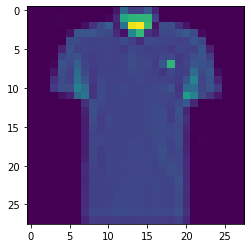

0


In [14]:
plt.imshow(train_imagesi[202,:,:])
plt.show()
print(train_labels[202])

In [15]:
train_labels[:12]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9], dtype=uint8)

In [16]:
train_images[202,:]

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -0.88188976, -0.36220472, -0.63779528, -0.62992126,
       -0.45669291, -0.79527559, -1.        , -1.        , -1.        ,
       -0.99212598, -0.99212598, -1.        , -0.99212598, -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -0.99212598, -0.98425197, -0.99212598, -1.        ,
       -1.        , -1.        , -1.        , -0.97637795, -0.77952756,
        0.22834646,  0.30708661,  0.31496063,  0.31496063, -0.5984252 ,
       -1.        , -1.        , -1.        , -1.        , -0.99212598,
       -1.        , -0.99212598, -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -0.98425197, -1.        , -1.        , -0.92125984, -0.70866142,
       -0.54330709, -0.4015748 , -0.83464567, -0.2519685 ,  0.94

2-слойная модель

Epoch 1/15
80/80 [==============================] - 1s 7ms/step - loss: 1.1402 - accuracy: 0.7055 - val_loss: 0.7781 - val_accuracy: 0.7947
Epoch 2/15
80/80 [==============================] - 0s 6ms/step - loss: 0.6699 - accuracy: 0.8160 - val_loss: 0.5953 - val_accuracy: 0.8229
Epoch 3/15
80/80 [==============================] - 0s 5ms/step - loss: 0.5389 - accuracy: 0.8407 - val_loss: 0.5113 - val_accuracy: 0.8400
Epoch 4/15
80/80 [==============================] - 0s 5ms/step - loss: 0.4713 - accuracy: 0.8532 - val_loss: 0.4627 - val_accuracy: 0.8481
Epoch 5/15
80/80 [==============================] - 0s 5ms/step - loss: 0.4290 - accuracy: 0.8621 - val_loss: 0.4277 - val_accuracy: 0.8589
Epoch 6/15
80/80 [==============================] - 0s 5ms/step - loss: 0.3976 - accuracy: 0.8706 - val_loss: 0.4094 - val_accuracy: 0.8629
Epoch 7/15
80/80 [==============================] - 0s 5ms/step - loss: 0.3779 - accuracy: 0.8736 - val_loss: 0.3908 - val_accuracy: 0.8680
Epoch 8/15
80/80 [==

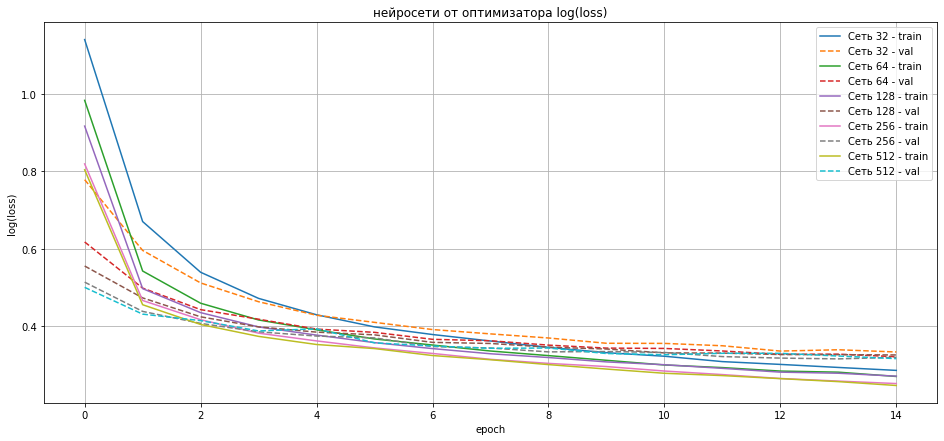

In [17]:
plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs)

result2 = []

for neuron_num in [32, 64, 128, 256, 512]:
  # Build the model.
  model2 = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
#  Dense(110, activation='relu'),
  Dense(neuron_num, activation='sigmoid'),
  Dense(10, activation='softmax'),
  ])

  # Compile the model.
  model2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
  )

  # Train the model.
  history2 = model2.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs=15,
  batch_size=600, validation_split=0.2
  )

  # накопление результатов
  model_name = f'Сеть {neuron_num} нейрона'
  model_accuracy = history2.history['accuracy'][epochs-1]
  model_val_accuracy = history2.history['val_accuracy'][epochs-1]
  result2.append([model_name,model_accuracy, model_val_accuracy])

  # картинки
  plt.plot(epoch,history2.history['loss'],'-',label = f'Сеть {neuron_num} - train')
  plt.plot(epoch,history2.history['val_loss'],'--',label = f'Сеть {neuron_num} - val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

In [18]:
# Оценка accuracy
pd.DataFrame(result2, columns=['model_name','model_accuracy','model_val_accuracy']).sort_values('model_val_accuracy',ascending=False).head(5)


,model_name,model_accuracy,model_val_accuracy
4,Сеть 512 нейрона,0.911438,0.888167
0,Сеть 32 нейрона,0.900146,0.884750
1,Сеть 64 нейрона,0.904146,0.883583
3,Сеть 256 нейрона,0.908583,0.882167
2,Сеть 128 нейрона,0.903271,0.881250


В двухслойной модели увеличение ширины слоя повышает точность обучения на тренировочной выборке. Наилучшая точность на валидационной выборке - при 512 нейронах в скрытом слое.

In [19]:
result_dense = []

# Build the model.
model2_64 = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
#  Dense(110, activation='relu'), # Скрытый слой из 110 нейронов с активацией relu
  Dense(64, activation='sigmoid'), # Скрытый слой из 64 нейронов с активацией sigmoid
  Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# Compile the model.
model2_64.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history2_64 = model2_64.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs=15,
  batch_size=600, validation_split=0.2
)

# Evaluate the model.
test_scores2_64 = model2_64.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
mod_name = f'2-слойная сеть'
mod_accuracy = history2_64.history['accuracy'][epochs-1]
mod_val_accuracy = history2_64.history['val_accuracy'][epochs-1]
test_accuracy = test_scores2_64[1]
result_dense.append([mod_name,mod_accuracy, mod_val_accuracy, test_accuracy])

Epoch 1/15
80/80 [==============================] - 1s 7ms/step - loss: 0.9694 - accuracy: 0.7212 - val_loss: 0.6060 - val_accuracy: 0.8087
Epoch 2/15
80/80 [==============================] - 0s 5ms/step - loss: 0.5346 - accuracy: 0.8269 - val_loss: 0.4845 - val_accuracy: 0.8365
Epoch 3/15
80/80 [==============================] - 0s 5ms/step - loss: 0.4505 - accuracy: 0.8497 - val_loss: 0.4390 - val_accuracy: 0.8454
Epoch 4/15
80/80 [==============================] - 0s 5ms/step - loss: 0.4113 - accuracy: 0.8586 - val_loss: 0.4101 - val_accuracy: 0.8553
Epoch 5/15
80/80 [==============================] - 0s 5ms/step - loss: 0.3829 - accuracy: 0.8675 - val_loss: 0.3867 - val_accuracy: 0.8619
Epoch 6/15
80/80 [==============================] - 0s 6ms/step - loss: 0.3640 - accuracy: 0.8726 - val_loss: 0.3783 - val_accuracy: 0.8631
Epoch 7/15
80/80 [==============================] - 0s 5ms/step - loss: 0.3470 - accuracy: 0.8776 - val_loss: 0.3667 - val_accuracy: 0.8710
Epoch 8/15
80/80 [==

3-слойная модель

In [20]:
# Build the model.
model3 = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(110, activation='relu'), # Скрытый слой из 110 нейронов с активацией relu
  Dense(64, activation='sigmoid'), # Скрытый слой из 64 нейронов с активацией sigmoid
  Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# Compile the model.
model3.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history3 = model3.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs=15,
  batch_size=600, validation_split=0.2
)

# Evaluate the model.
test_scores3 = model3.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
mod_name = f'3-слойная сеть'
mod_accuracy = history3.history['accuracy'][epochs-1]
mod_val_accuracy = history3.history['val_accuracy'][epochs-1]
test_accuracy = test_scores3[1]
result_dense.append([mod_name,mod_accuracy, mod_val_accuracy, test_accuracy])

Epoch 1/15
80/80 [==============================] - 1s 8ms/step - loss: 0.9840 - accuracy: 0.7015 - val_loss: 0.5882 - val_accuracy: 0.8098
Epoch 2/15
80/80 [==============================] - 0s 6ms/step - loss: 0.5104 - accuracy: 0.8313 - val_loss: 0.4676 - val_accuracy: 0.8403
Epoch 3/15
80/80 [==============================] - 0s 6ms/step - loss: 0.4304 - accuracy: 0.8528 - val_loss: 0.4236 - val_accuracy: 0.8511
Epoch 4/15
80/80 [==============================] - 0s 5ms/step - loss: 0.3924 - accuracy: 0.8634 - val_loss: 0.3953 - val_accuracy: 0.8602
Epoch 5/15
80/80 [==============================] - 0s 5ms/step - loss: 0.3670 - accuracy: 0.8704 - val_loss: 0.3894 - val_accuracy: 0.8609
Epoch 6/15
80/80 [==============================] - 0s 6ms/step - loss: 0.3457 - accuracy: 0.8784 - val_loss: 0.3658 - val_accuracy: 0.8689
Epoch 7/15
80/80 [==============================] - 0s 6ms/step - loss: 0.3276 - accuracy: 0.8829 - val_loss: 0.3589 - val_accuracy: 0.8716
Epoch 8/15
80/80 [==

5-слойная модель

In [21]:
# Build the model.
model5 = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(110, activation='relu'), # Скрытый слой из 110 нейронов с активацией relu
  Dense(256, activation='tanh'), # Скрытый слой из 256 нейронов с активацией tanh
  Dense(128, activation='tanh'), # Скрытый слой из 128 нейронов с активацией tanh
  Dense(64, activation='sigmoid'), # Скрытый слой из 64 нейронов с активацией sigmoid
  Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# Compile the model.
model5.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history5 = model5.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs=15,
  batch_size=600, validation_split=0.2
)

# Evaluate the model.
test_scores5 = model5.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
mod_name = f'5-слойная сеть'
mod_accuracy = history5.history['accuracy'][epochs-1]
mod_val_accuracy = history5.history['val_accuracy'][epochs-1]
test_accuracy = test_scores5[1]
result_dense.append([mod_name,mod_accuracy, mod_val_accuracy, test_accuracy])

Epoch 1/15
80/80 [==============================] - 1s 9ms/step - loss: 0.9917 - accuracy: 0.7119 - val_loss: 0.5810 - val_accuracy: 0.8207
Epoch 2/15
80/80 [==============================] - 1s 6ms/step - loss: 0.4872 - accuracy: 0.8416 - val_loss: 0.4630 - val_accuracy: 0.8452
Epoch 3/15
80/80 [==============================] - 1s 6ms/step - loss: 0.4122 - accuracy: 0.8619 - val_loss: 0.4025 - val_accuracy: 0.8631
Epoch 4/15
80/80 [==============================] - 1s 7ms/step - loss: 0.3627 - accuracy: 0.8746 - val_loss: 0.3739 - val_accuracy: 0.8713
Epoch 5/15
80/80 [==============================] - 1s 7ms/step - loss: 0.3432 - accuracy: 0.8813 - val_loss: 0.3596 - val_accuracy: 0.8760
Epoch 6/15
80/80 [==============================] - 1s 6ms/step - loss: 0.3199 - accuracy: 0.8880 - val_loss: 0.3603 - val_accuracy: 0.8735
Epoch 7/15
80/80 [==============================] - 1s 7ms/step - loss: 0.3024 - accuracy: 0.8935 - val_loss: 0.3409 - val_accuracy: 0.8785
Epoch 8/15
80/80 [==

10-слойная модель

In [22]:
# Build the model.
model10 = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(110, activation='relu'), 
  Dense(256, activation='tanh'),
  Dense(128, activation='tanh'),
  Dense(60, activation='sigmoid'),
  Dense(60, activation='relu'),
  Dense(64, activation='tanh'),
  Dense(128, activation='tanh'),
  Dense(256, activation='relu'),
  Dense(64, activation='sigmoid'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model10.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history10 = model10.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs=15,
  batch_size=600, validation_split=0.2
)

# Evaluate the model.
test_scores10 = model10.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
mod_name = f'10-слойная сеть'
mod_accuracy = history10.history['accuracy'][epochs-1]
mod_val_accuracy = history10.history['val_accuracy'][epochs-1]
test_accuracy = test_scores10[1]
result_dense.append([mod_name,mod_accuracy, mod_val_accuracy, test_accuracy])

Epoch 1/15
80/80 [==============================] - 2s 12ms/step - loss: 1.3154 - accuracy: 0.4810 - val_loss: 0.8538 - val_accuracy: 0.6745
Epoch 2/15
80/80 [==============================] - 1s 8ms/step - loss: 0.6789 - accuracy: 0.7684 - val_loss: 0.5716 - val_accuracy: 0.8219
Epoch 3/15
80/80 [==============================] - 1s 8ms/step - loss: 0.5220 - accuracy: 0.8353 - val_loss: 0.5093 - val_accuracy: 0.8347
Epoch 4/15
80/80 [==============================] - 1s 9ms/step - loss: 0.4549 - accuracy: 0.8540 - val_loss: 0.4624 - val_accuracy: 0.8478
Epoch 5/15
80/80 [==============================] - 1s 8ms/step - loss: 0.4064 - accuracy: 0.8684 - val_loss: 0.4113 - val_accuracy: 0.8648
Epoch 6/15
80/80 [==============================] - 1s 8ms/step - loss: 0.3742 - accuracy: 0.8756 - val_loss: 0.4173 - val_accuracy: 0.8619
Epoch 7/15
80/80 [==============================] - 1s 9ms/step - loss: 0.3587 - accuracy: 0.8806 - val_loss: 0.4042 - val_accuracy: 0.8664
Epoch 8/15
80/80 [=

Text(0.5, 1.0, 'Потери от эпох')

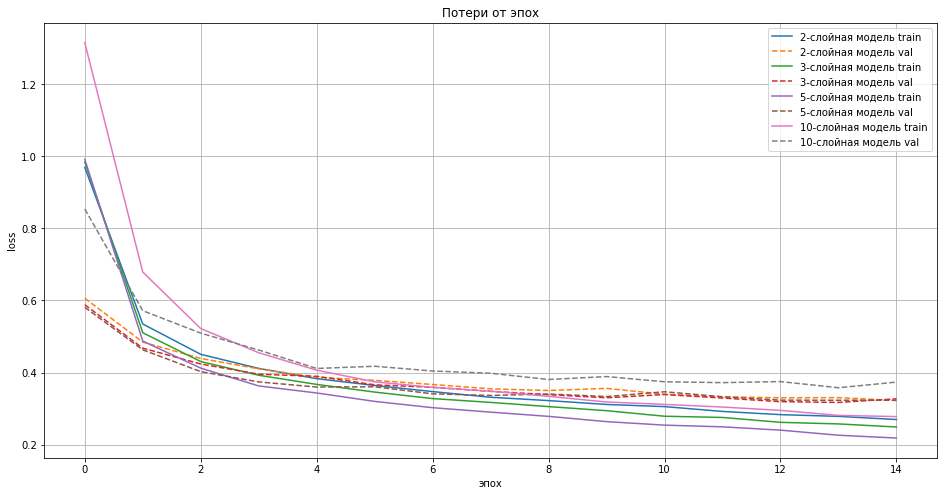

In [23]:
plt.figure(figsize=(16, 8))

plt.plot(history2_64.history['loss'],'-', label='2-слойная модель train')
plt.plot(history2_64.history['val_loss'],'--', label='2-слойная модель val')
plt.plot(history3.history['loss'],'-', label='3-слойная модель train')
plt.plot(history3.history['val_loss'],'--', label='3-слойная модель val')
plt.plot(history5.history['loss'],'-', label='5-слойная модель train')
plt.plot(history5.history['val_loss'],'--', label='5-слойная модель val')
plt.plot(history10.history['loss'],'-', label='10-слойная модель train')
plt.plot(history10.history['val_loss'],'--', label='10-слойная модель val')
plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('Потери от эпох')

Text(0.5, 1.0, 'Accuracy от эпох')

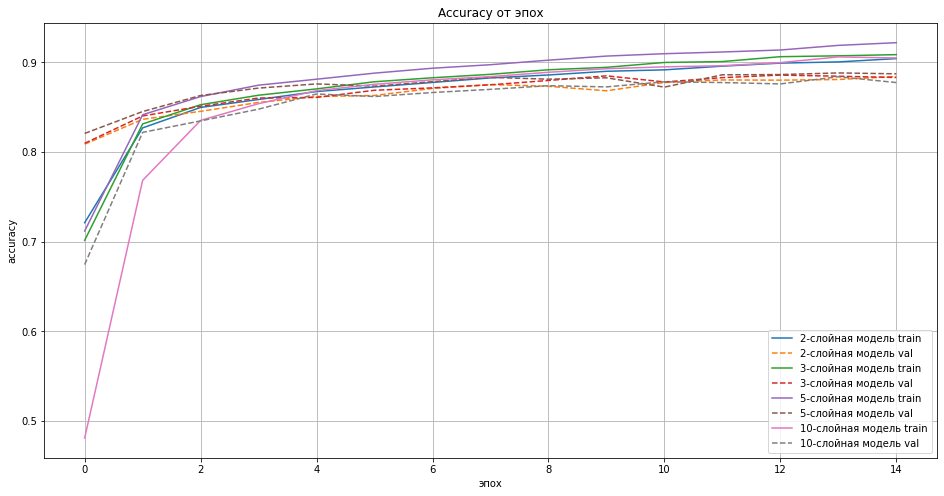

In [24]:
plt.figure(figsize=(16, 8))

plt.plot(history2_64.history['accuracy'],'-', label='2-слойная модель train')
plt.plot(history2_64.history['val_accuracy'],'--', label='2-слойная модель val')
plt.plot(history3.history['accuracy'],'-', label='3-слойная модель train')
plt.plot(history3.history['val_accuracy'],'--', label='3-слойная модель val')
plt.plot(history5.history['accuracy'],'-', label='5-слойная модель train')
plt.plot(history5.history['val_accuracy'],'--', label='5-слойная модель val')
plt.plot(history10.history['accuracy'],'-', label='10-слойная модель train')
plt.plot(history10.history['val_accuracy'],'--', label='10-слойная модель val')
plt.xlabel('эпох')
plt.ylabel('accuracy')
plt.legend()
plt.grid('On')
plt.title('Accuracy от эпох')

In [25]:
# Оценка accuracy
pd.DataFrame(result_dense, columns=['mod_name','mod_accuracy','mod_val_accuracy', 'test_accuracy']).sort_values('mod_val_accuracy',ascending=False).head(5)

,mod_name,mod_accuracy,mod_val_accuracy,test_accuracy
2,5-слойная сеть,0.921979,0.887250,0.8810
0,2-слойная сеть,0.904229,0.884250,0.8758
1,3-слойная сеть,0.908646,0.883167,0.8754
3,10-слойная сеть,0.904938,0.877500,0.8711


В 5-слойной модели точность выше.

Эксперимент с разными оптимизаторами для одной начальной модели:

создаем модель model
сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
загружаем веса modeli.load_weights('model.h5')
компилируем modeli с одним из оптимизаторов
вычисляем ошибку для modeli без обучения (т.к. все модели начинают с одной точки, то все ошибки должны быть одинаковые, но будем контролировать это и считаем каждый раз заново)
проводим обучение модели и пишем ошибки в истории hh
выводим ошибки для 0-го момента и каждой эпохи обучения по тестовой и валидационной частям данных

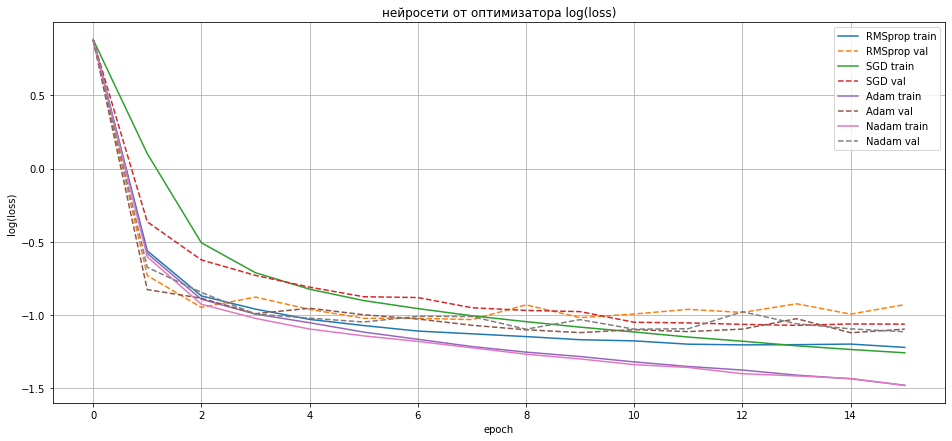

In [26]:
# создаем модель model
model = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(110, activation='relu'), # Скрытый слой из 110 нейронов с активацией relu
  Dense(256, activation='tanh'), # Скрытый слой из 256 нейронов с активацией tanh
  Dense(128, activation='tanh'), # Скрытый слой из 128 нейронов с активацией tanh
  Dense(64, activation='sigmoid'), # Скрытый слой из 64 нейронов с активацией sigmoid
  Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

result=[]

# будем изменять оптимизаторы
for i_optim in [optimizers.RMSprop(),optimizers.SGD( ),optimizers.Adam( ),optimizers.Nadam( )]:
  # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
  modeli = Sequential([
                      Dense(128, activation='relu', input_shape=(784,)),
                      Dense(110, activation='relu'),
                      Dense(256, activation='tanh'),
                      Dense(128, activation='tanh'),
                      Dense(64, activation='sigmoid'),
                      Dense(10, activation='softmax'),
                      ])
  
  # загружаем веса modeli.load_weights('model.h5')
  modeli.load_weights('model.h5')
  # компилируем modeli с одним из оптимизаторов
  modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # вычисляем ошибку для modeli без обучения
  hh0_tr = modeli.evaluate(  train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
  hh0_val = modeli.evaluate(  train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
  # проводим обучение модели 
  hh = modeli.fit(train_images, to_categorical(train_labels), epochs=epochs,batch_size=32, validation_split=0.2, verbose = 0)

  # накопление результатов
  method_name = modeli.optimizer.get_config()['name']
  method_accuracy = hh.history['accuracy'][14]
  method_val_accuracy = hh.history['val_accuracy'][14]
  result.append([method_name,method_accuracy, method_val_accuracy])


  # картинки
  plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = modeli.optimizer.get_config()['name']+' train')
  plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = modeli.optimizer.get_config()['name']+' val')


plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

In [27]:
# Оценка accuracy
import pandas as pd
pd.DataFrame(result, columns=['method_name','method_accuracy','method_val_accuracy']).sort_values('method_val_accuracy',ascending=False).head(4)

,method_name,method_accuracy,method_val_accuracy
3,Nadam,0.916021,0.889833
2,Adam,0.915750,0.885000
1,SGD,0.899625,0.874833
0,RMSprop,0.895187,0.865000


Вывод

***Качество классификации в нейросети на тестовом наборе помогла улучшить настройка архитектуры модели:

подбор ширины скрытого слоя
подбор количества слоев
подбор оптимизатора***

In [28]:
modeli.optimizer.get_config()

{'beta_1': 0.9,
 'beta_2': 0.999,
 'decay': 0.004,
 'epsilon': 1e-07,
 'learning_rate': 0.001,
 'name': 'Nadam'}

Посмотрим на результат предсказаний для обученной модели (последняя в цикле)

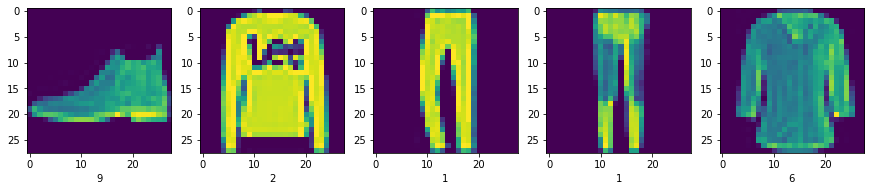

In [32]:
N = 5
y_pred = modeli.predict(test_images[:N,:])
y_pred_class = np.argmax(y_pred,axis=1)
plt.figure(figsize =(3*N,5))
for i in range(N):
  plt.subplot(1,N,i+1)
  plt.imshow(test_images[i,:].reshape(28,28))
  plt.xlabel(str(y_pred_class[i]))
plt.show()

In [33]:
y_pred_class

array([9, 2, 1, 1, 6])

Оценим предсказания на тестовой выборке.

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [35]:
test_pred = np.argmax(modeli.predict(test_images), axis=1)

In [36]:
print(classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.80      0.79      0.79      1000
           3       0.87      0.91      0.89      1000
           4       0.81      0.82      0.82      1000
           5       0.96      0.95      0.96      1000
           6       0.71      0.72      0.71      1000
           7       0.90      0.97      0.93      1000
           8       0.97      0.97      0.97      1000
           9       0.97      0.91      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [37]:
print(confusion_matrix(test_labels, test_pred))

[[812   1  36  29   4   3 109   0   6   0]
 [  3 964   1  26   2   0   4   0   0   0]
 [ 10   1 793  15  92   0  86   0   3   0]
 [ 25   5   7 905  31   1  20   0   6   0]
 [  0   1  75  32 822   0  68   0   2   0]
 [  0   0   0   1   0 951   0  32   1  15]
 [106   0  80  30  57   0 716   0  11   0]
 [  0   0   0   0   0  16   0 969   0  15]
 [  6   0   3   5   4   3   7   4 968   0]
 [  1   0   0   0   0  12   0  74   0 913]]


In [38]:
# Save the model to disk.
model.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')